# **Bibliotecas para instalar**

In [ ]:
!pip install -U -q google.generativeai

In [ ]:
import re
import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import google.generativeai as genai
import google.ai.generativelanguage as glm

# Used to securely store your API key
from google.colab import userdata
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Grab an API Key

In [ ]:
# Or use `os.getenv('API_KEY')` to fetch an environment variable.
API_KEY=userdata.get('API_KEY')

genai.configure(api_key=API_KEY)

In [ ]:
for m in genai.list_models():
  if 'embedContent' in m.supported_generation_methods:
    print(m.name)

models/embedding-001
models/text-embedding-004


# **Importar y revisar DataSet**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Ruta al archivo en tu Drive (ajusta si es necesario)
file_path = '/content/drive/MyDrive/Asab/TrabajoDeGradoHNavarro/BasesDeDatos/DataFrame.xlsx'

# Leer el archivo XLSX usando pandas
df = pd.read_excel(file_path)

# Mostrar las primeras filas para verificar
print(df.head())

In [ ]:
categoria_a_numero = {
    "MÚSICA Y CONTEXTO: MÚSICAS Y EXPRESIONES SONORAS REGIONALES, TRADICIONALES Y POPULARES DE COLOMBIA, LATINOAMÉRICA Y EL MUNDO": 1,
    "PEDAGOGÍA Y DIDÁCTICA DE LA MÚSICA": 2,
    "PERCEPCIÓN, EXPERIENCIA Y COGNICIÓN MUSICAL": 3,
    "MÚSICA, CIENCIAS Y TECNOLOGÍA": 4,
    "AGENTES CULTURALES, POLÍTICAS E INSTITUCIONES: CREADORES, GESTORES, PRODUCTORES, DIFUSORES, INTÉRPRETES": 5,
    "Otra línea": 6,
    "No inscribe": 7
}

In [ ]:
categoria_a_numero_facultad = {
    "ESTÉTICA Y TEORÍAS DEL ARTE": 1,
    "ARTE Y PEDAGOGÍA": 2,
    "ARTE Y CULTURAS TRADICIONALES POPULARES": 3,
    "ARTE Y SOCIEDAD": 4,
}

In [ ]:
#df['NumeroLineaProjecto'] = df['LineaProyecto'].map(categoria_a_numero)
df['NumeroLineaFacultad'] = df['LineaFacultad'].map(categoria_a_numero_facultad)

In [ ]:
df.head(10)

,Justificacion,LineaProyecto,PreguntaProblema,LineaFacultad,año de presentación,NumeroLineaProjecto,NumeroLineaFacultad
0,este trabajo hace un aporte a la consolidacion...,MÚSICA Y CONTEXTO: MÚSICAS Y EXPRESIONES SONOR...,¿cómo se pueden aplicar los métodos galamian y...,ESTÉTICA Y TEORÍAS DEL ARTE,2019,1,1.0
1,este proyecto se inscribe en la linea de inves...,PEDAGOGÍA Y DIDÁCTICA DE LA MÚSICA,¿qué tipo de procesos artísticos y pedagógicos...,ARTE Y PEDAGOGÍA,2019,2,2.0
2,este trabajo hace un aporte a la linea de inve...,MÚSICA Y CONTEXTO: MÚSICAS Y EXPRESIONES SONOR...,¿cómo hacer un catálogo completo de la vida y ...,ARTE Y CULTURAS TRADICIONALES POPULARES,2019,1,3.0
3,este proyecto se inscribe en la linea de inves...,MÚSICA Y CONTEXTO: MÚSICAS Y EXPRESIONES SONOR...,"¿a partir del análisis, qué elementos de los m...",ARTE Y PEDAGOGÍA,2018,1,2.0
4,este trabajo se inscribe en la linea de invest...,PEDAGOGÍA Y DIDÁCTICA DE LA MÚSICA,¿cuáles son los recursos instrumentales y orqu...,ARTE Y CULTURAS TRADICIONALES POPULARES,2018,2,3.0
5,"en ese sentido, este proyecto se inscribe en l...","PERCEPCIÓN, EXPERIENCIA Y COGNICIÓN MUSICAL",¿tiene la “música práctica” algún papel import...,ESTÉTICA Y TEORÍAS DEL ARTE,2019,3,1.0
6,este proyecto se inscribe en la linea de inves...,MÚSICA Y CONTEXTO: MÚSICAS Y EXPRESIONES SONOR...,¿cuál ha sido la evolución del merengue domini...,ARTE Y CULTURAS TRADICIONALES POPULARES,2019,1,3.0
7,este trabajo hace un aporte a la linea de inve...,"MÚSICA, CIENCIAS Y TECNOLOGÍA","¿cómo los materiales de construcción, las laca...",ESTÉTICA Y TEORÍAS DEL ARTE,2019,4,1.0
8,este proyecto se inscribe en la linea de inves...,MÚSICA Y CONTEXTO: MÚSICAS Y EXPRESIONES SONOR...,¿de qué manera se aplican las herramientas de ...,ARTE Y SOCIEDAD,2019,1,4.0
9,este proyecto se inscribe en la linea de inves...,"AGENTES CULTURALES, POLÍTICAS E INSTITUCIONES:...",¿cuáles son las características musicales de l...,ESTÉTICA Y TEORÍAS DEL ARTE,2019,5,1.0


# **Conteo de Palabras**

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


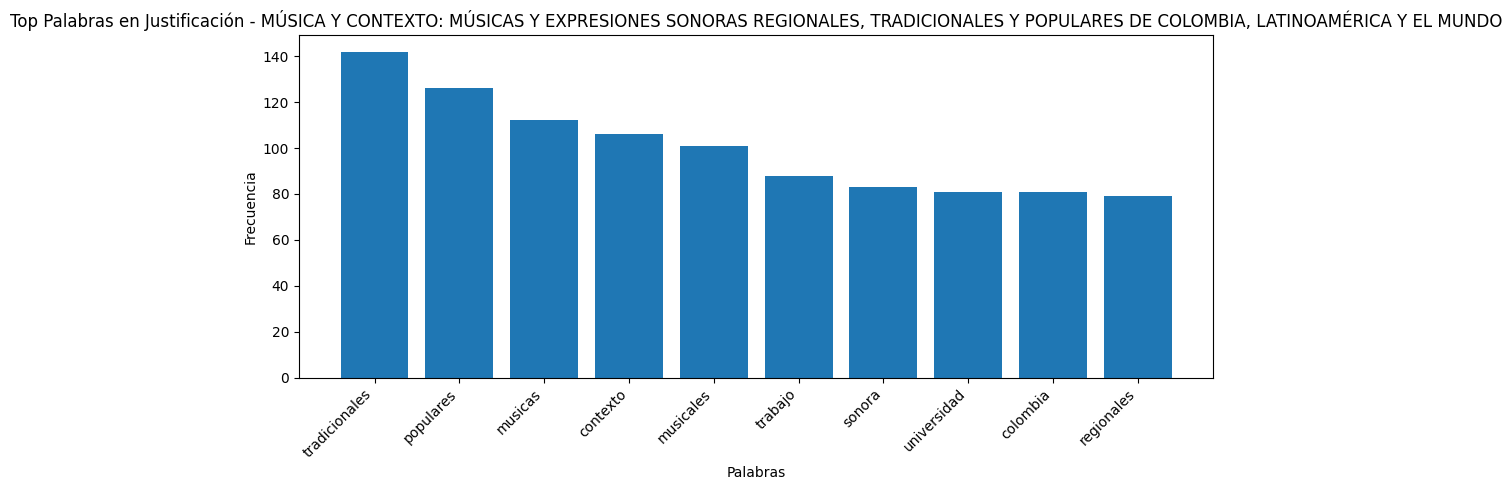

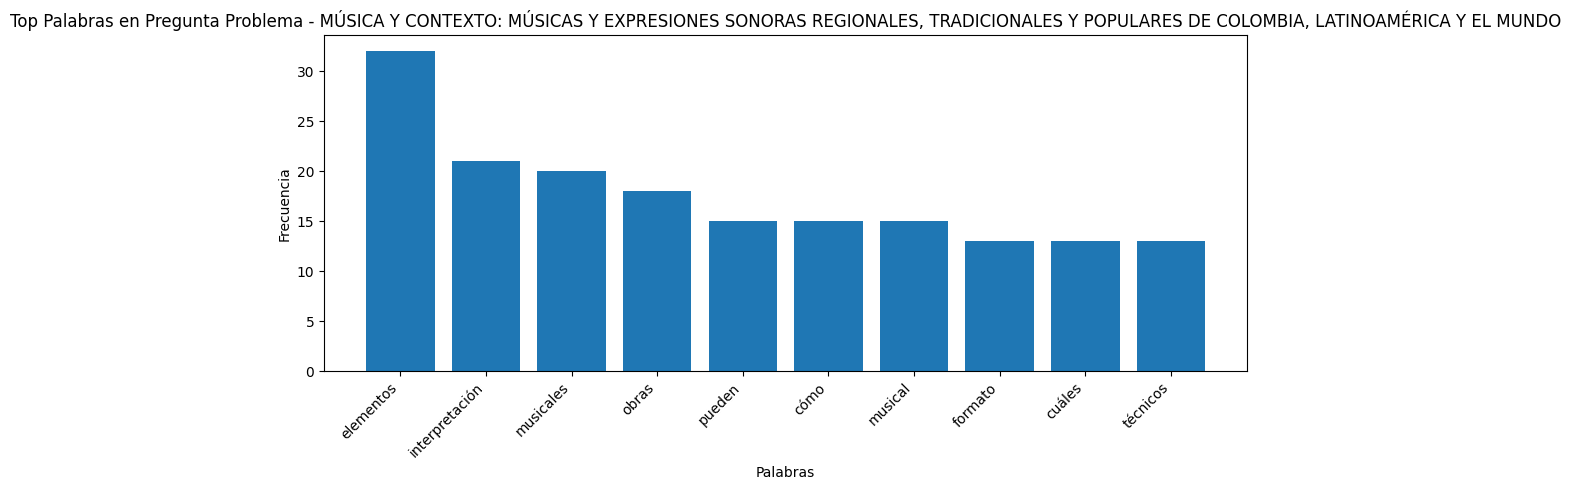

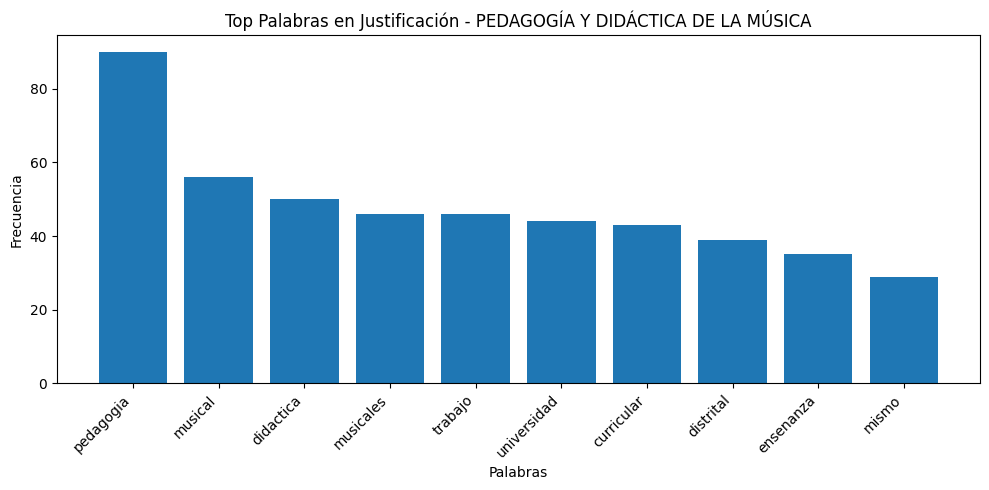

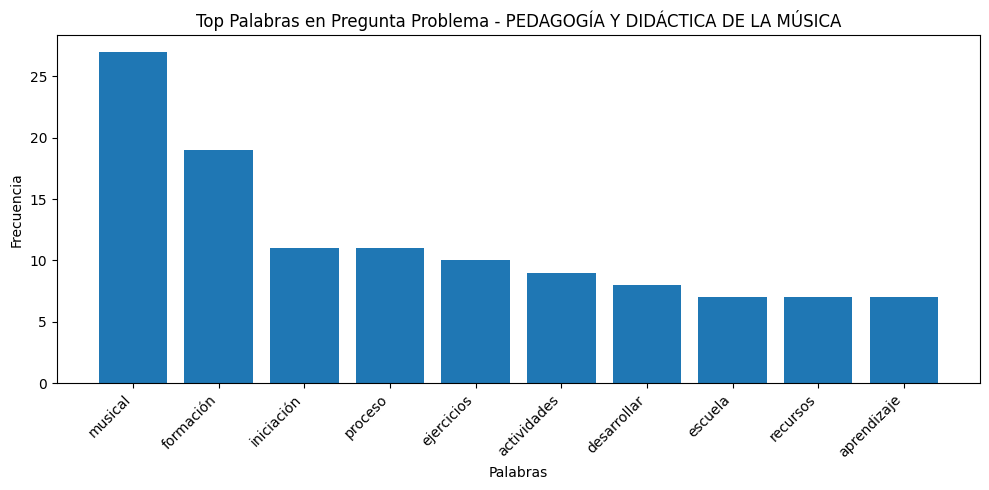

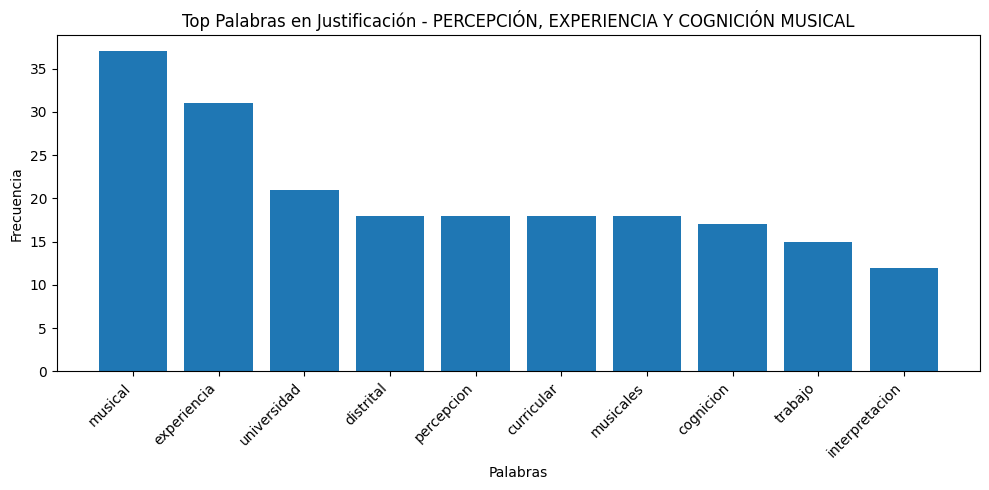

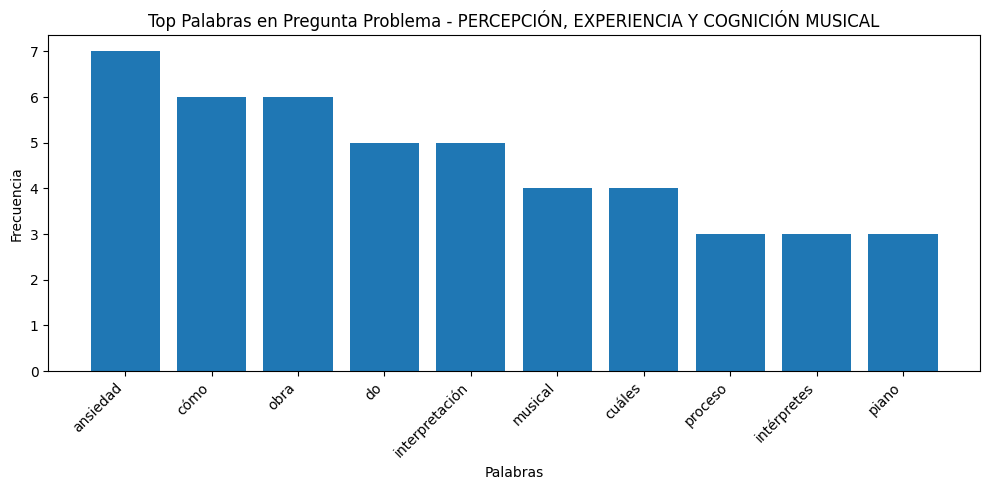

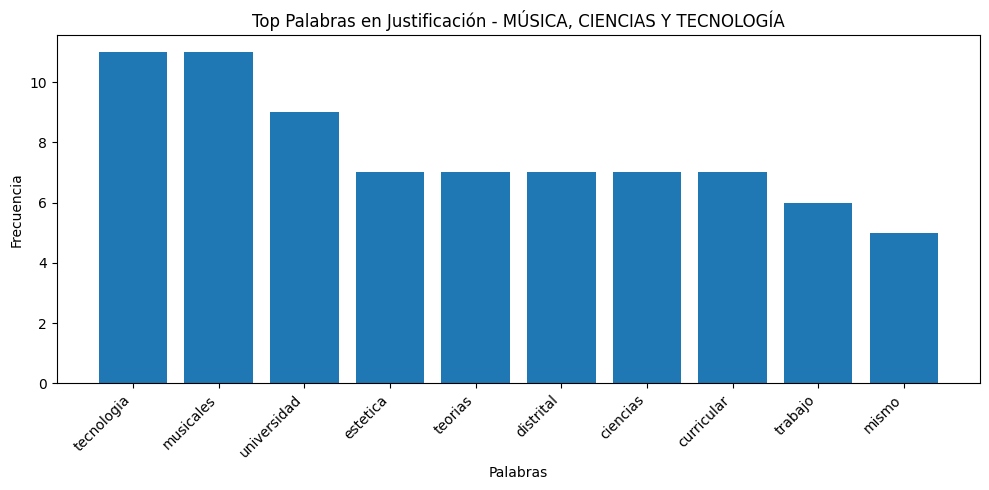

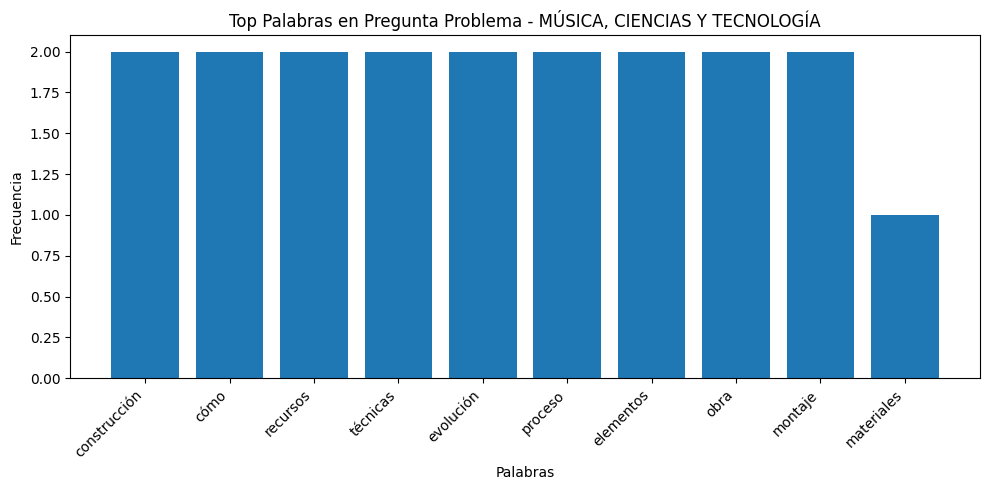

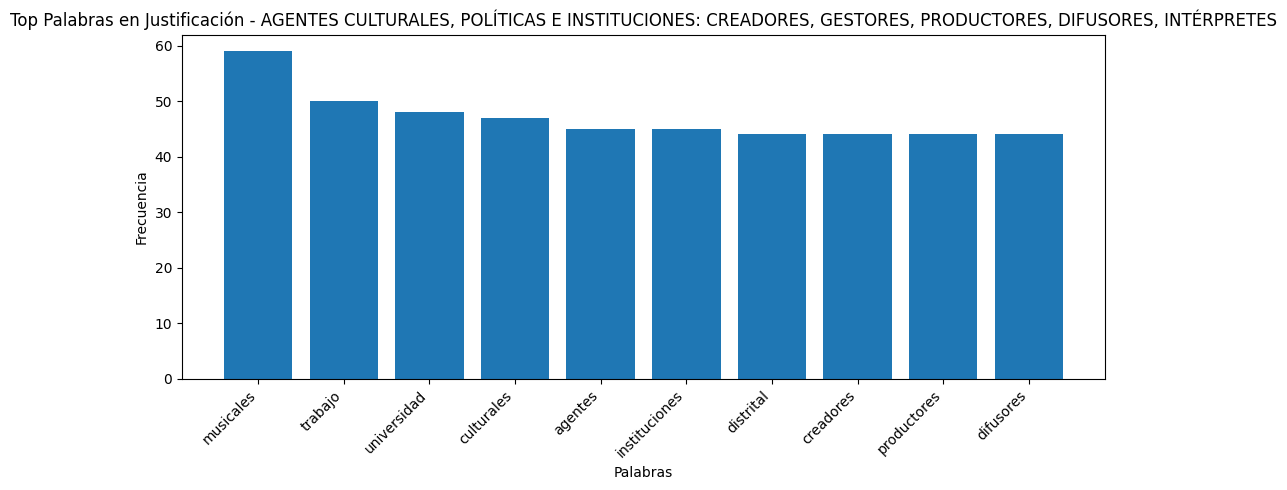

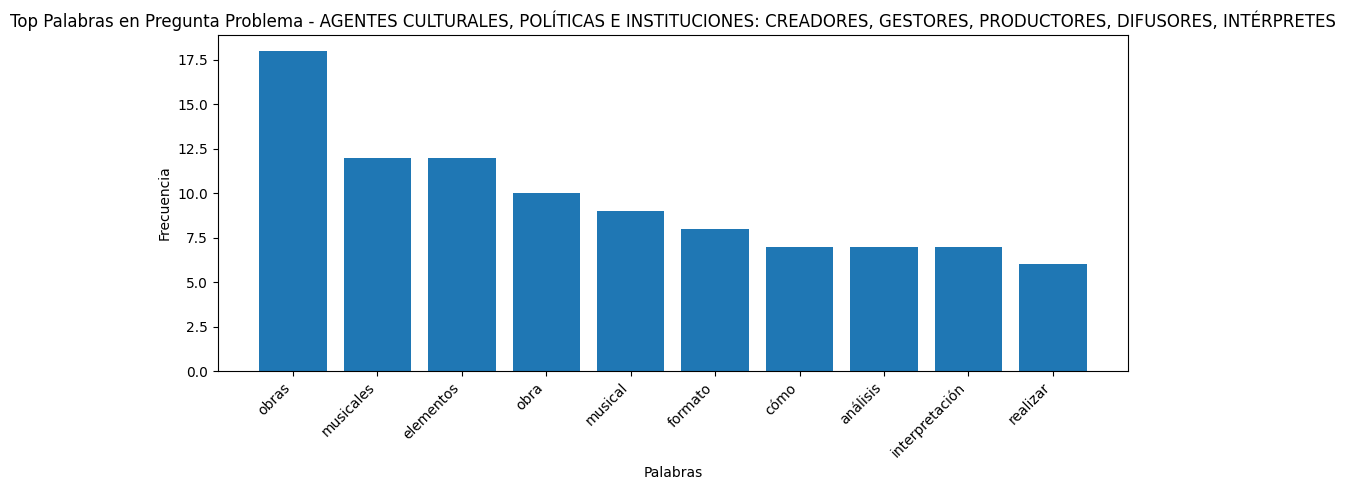

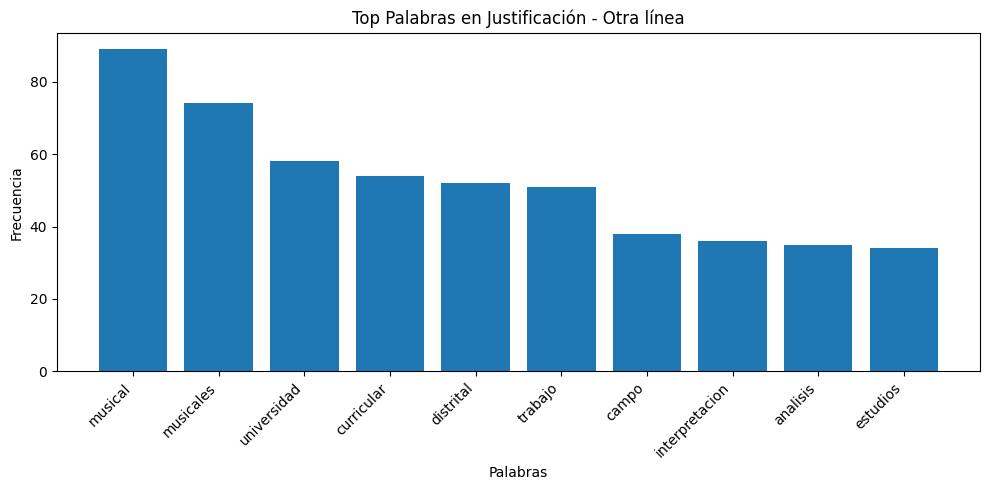

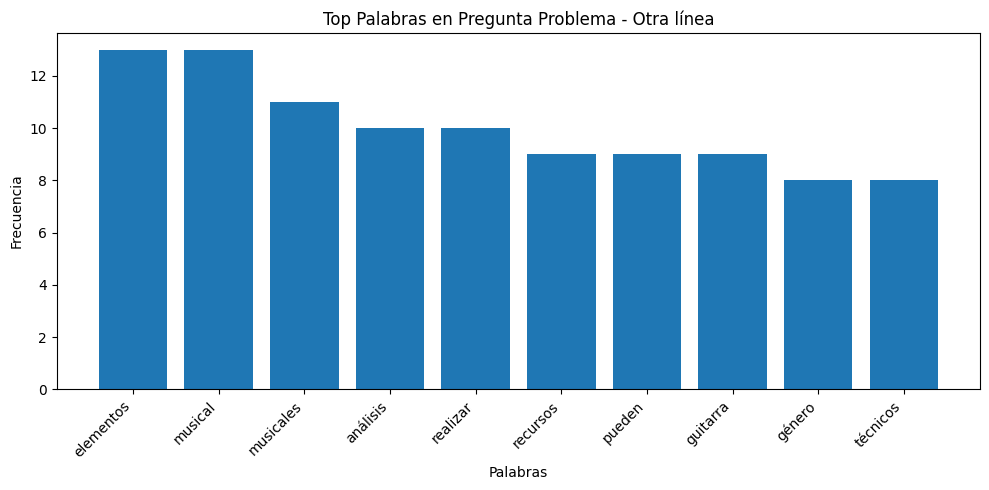

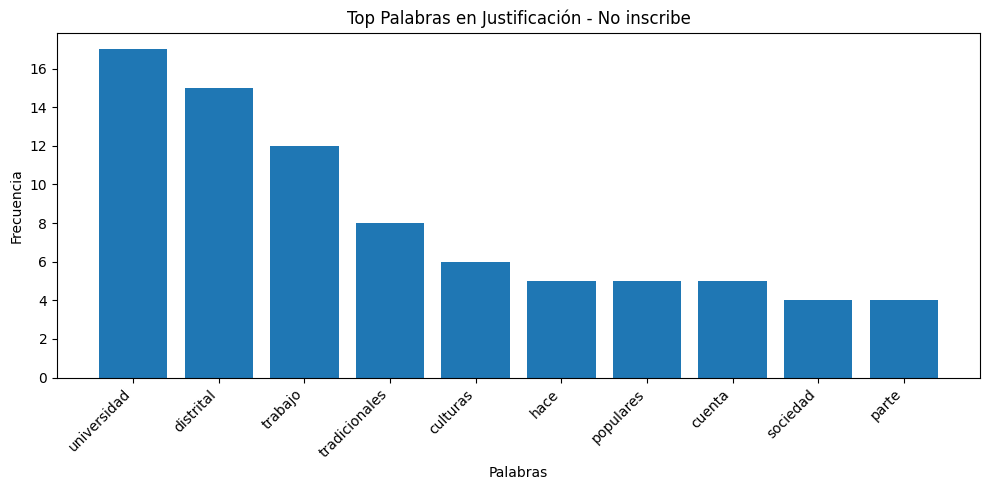

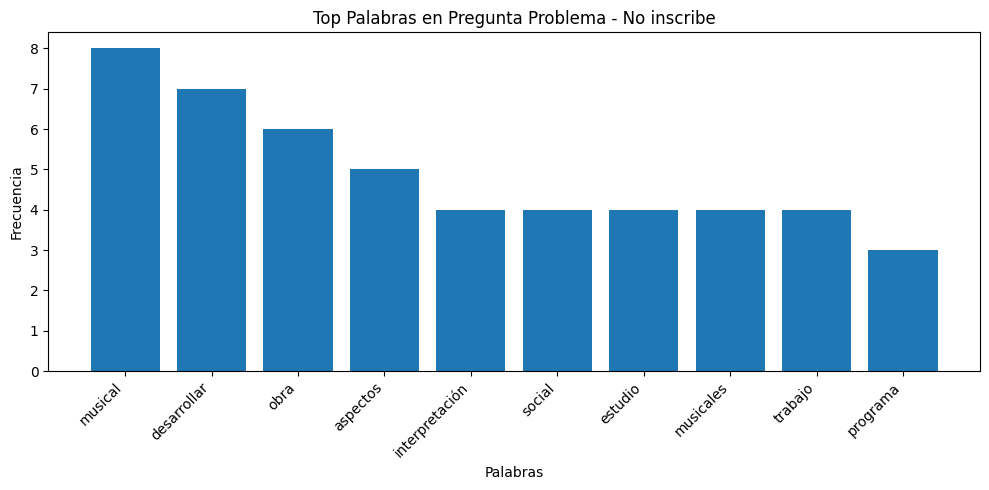

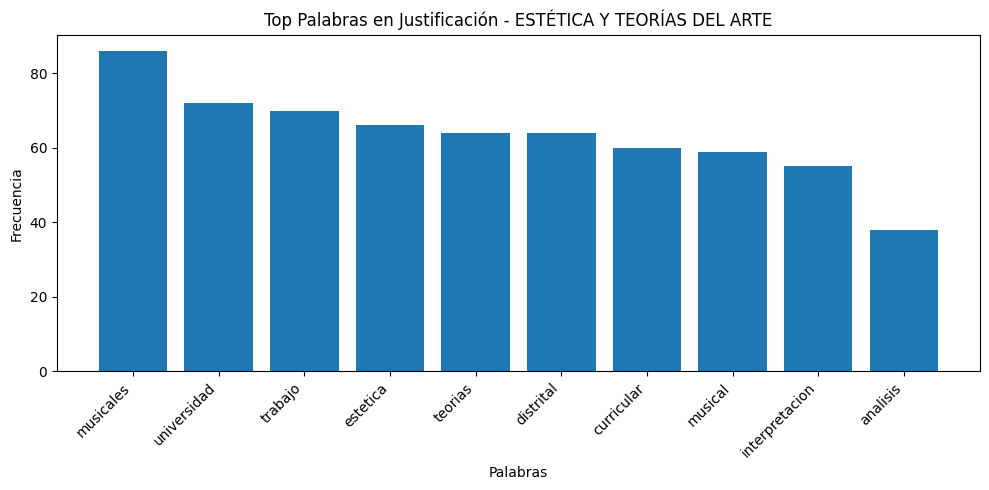

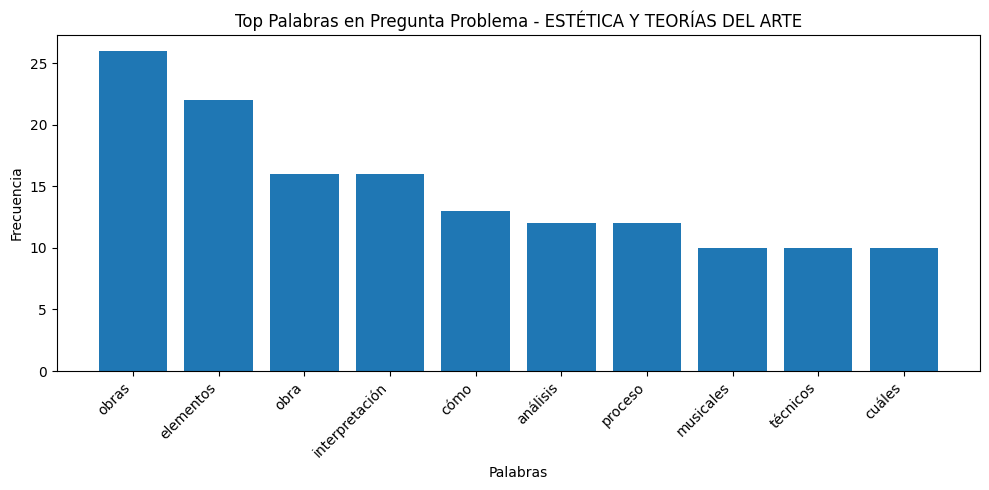

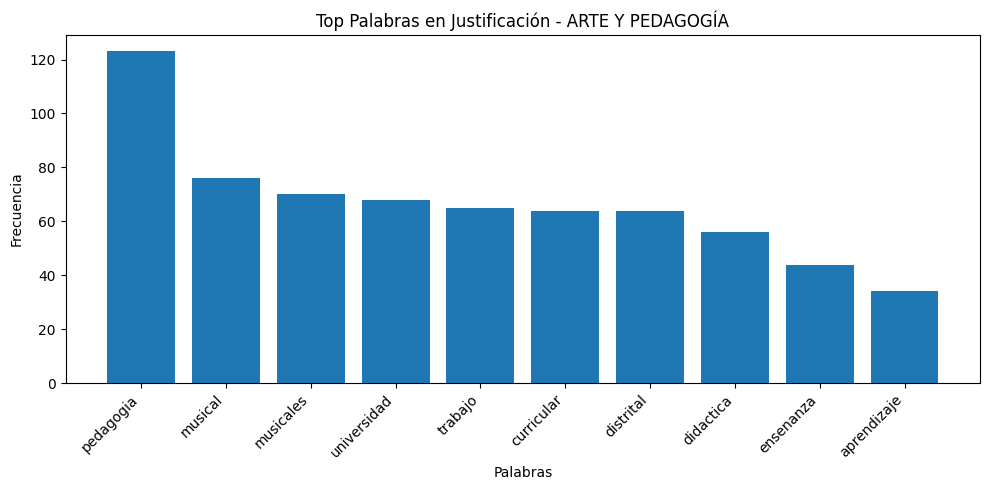

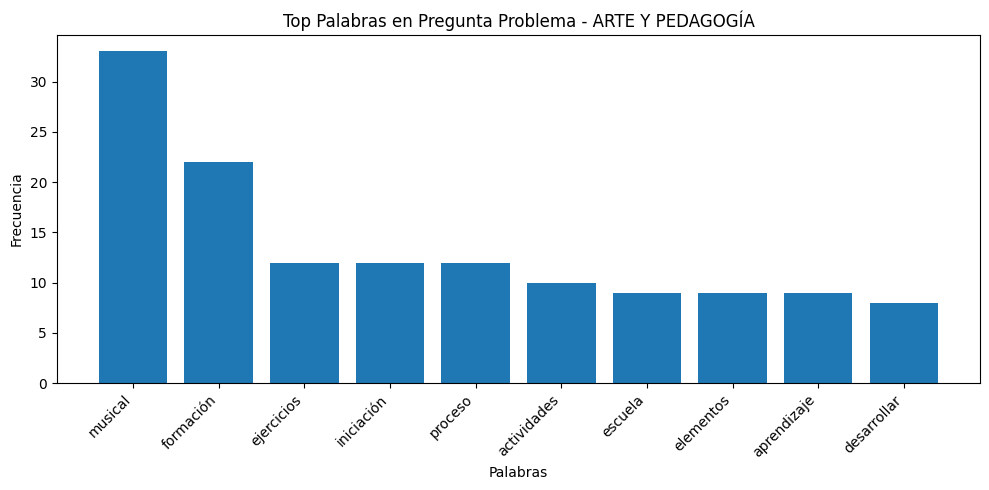

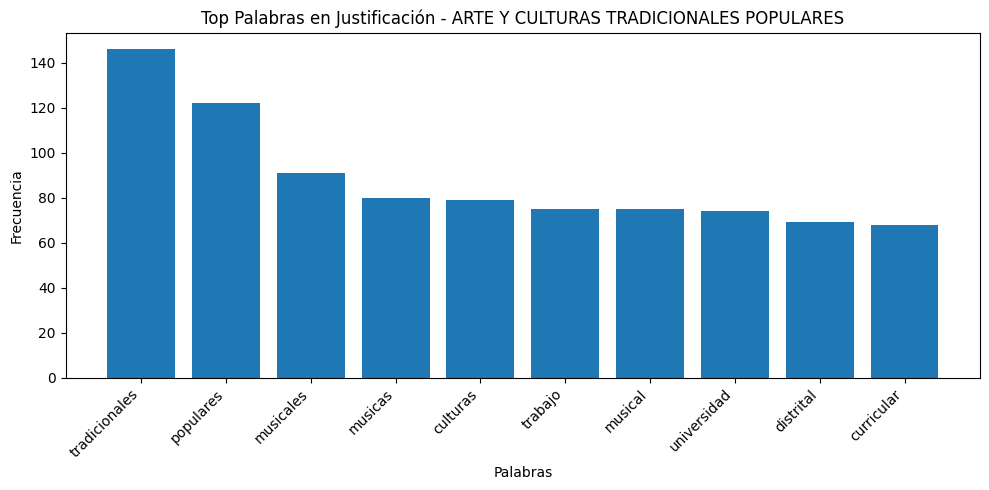

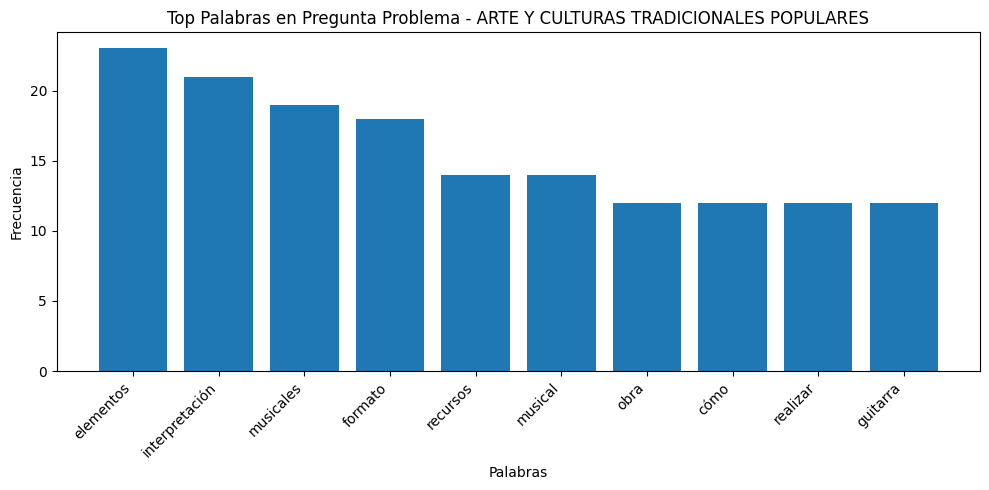

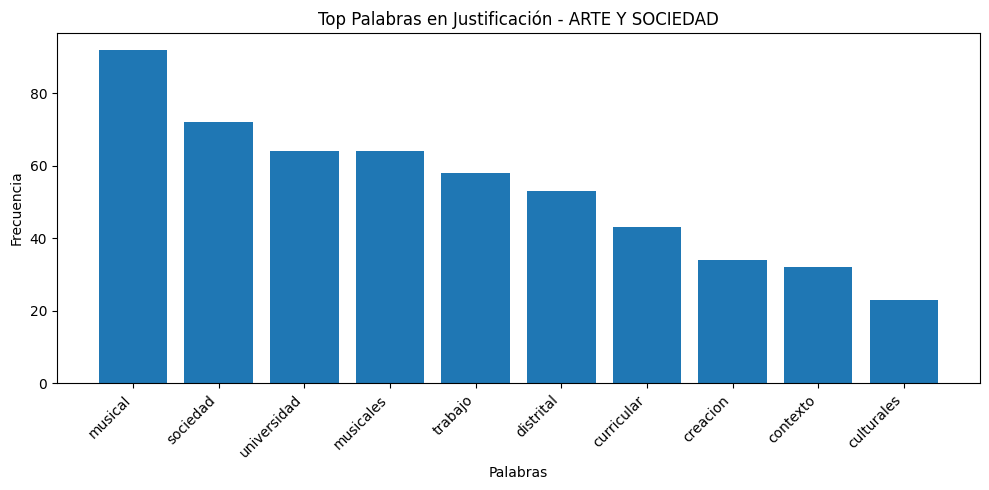

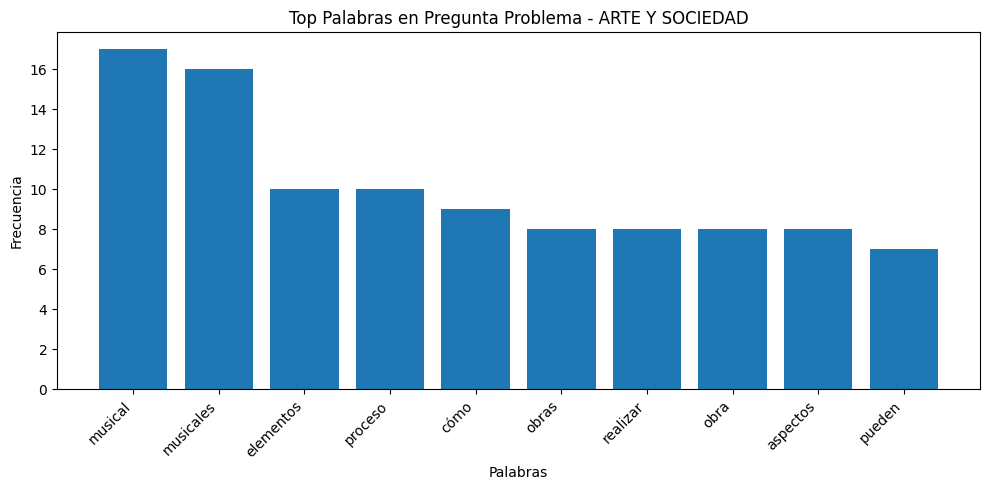

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt

# Descargar recursos de NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Función para preprocesamiento y conteo de palabras
def preprocesar_y_contar(texto):
    stop_words = stopwords.words('spanish')

    # Agregar palabras personalizadas a la lista de stopwords
    palabras_personalizadas = ["linea", "inscribe", "artes", "arte", "proyecto", "musica", "música", "investigacion","asab","francisco","jose","caldas","facultad"]
    stop_words.extend(palabras_personalizadas)

    lemmatizer = WordNetLemmatizer()
    tokens = nltk.word_tokenize(texto.lower())
    palabras_limpias = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words and token.isalnum()]
    conteo_palabras = {}
    for palabra in palabras_limpias:
        if palabra not in conteo_palabras:
            conteo_palabras[palabra] = 0
        conteo_palabras[palabra] += 1
    return conteo_palabras

# Diccionarios de líneas de investigación
categoria_a_numero = {
    "MÚSICA Y CONTEXTO: MÚSICAS Y EXPRESIONES SONORAS REGIONALES, TRADICIONALES Y POPULARES DE COLOMBIA, LATINOAMÉRICA Y EL MUNDO": 1,
    "PEDAGOGÍA Y DIDÁCTICA DE LA MÚSICA": 2,
    "PERCEPCIÓN, EXPERIENCIA Y COGNICIÓN MUSICAL": 3,
    "MÚSICA, CIENCIAS Y TECNOLOGÍA": 4,
    "AGENTES CULTURALES, POLÍTICAS E INSTITUCIONES: CREADORES, GESTORES, PRODUCTORES, DIFUSORES, INTÉRPRETES": 5,
    "Otra línea": 6,
    "No inscribe": 7
}

categoria_a_numero_facultad = {
    "ESTÉTICA Y TEORÍAS DEL ARTE": 1,
    "ARTE Y PEDAGOGÍA": 2,
    "ARTE Y CULTURAS TRADICIONALES POPULARES": 3,
    "ARTE Y SOCIEDAD": 4,
}

# Agrupar por NumeroLineaProjecto
grouped_proyecto = df.groupby('NumeroLineaProjecto')

# Conteo de palabras por proyecto (Justificacion y PreguntaProblema)
conteo_palabras_proyecto = {}
for nombre_grupo, grupo in grouped_proyecto:
    conteo_palabras_proyecto[nombre_grupo] = {
        'Justificacion': preprocesar_y_contar(" ".join(grupo['Justificacion'])),
        'PreguntaProblema': preprocesar_y_contar(" ".join(grupo['PreguntaProblema']))
    }

# Función para mostrar top palabras con nombres de líneas
def mostrar_top_palabras(conteo_palabras, titulo, tipo_linea, numero_linea):
    # Obtener las 10 palabras más frecuentes
    top_palabras = sorted(conteo_palabras.items(), key=lambda item: item[1], reverse=True)[:10]
    palabras, frecuencias = zip(*top_palabras)

    # Crear gráfico de barras
    plt.figure(figsize=(10, 5))
    plt.bar(palabras, frecuencias)
    plt.xlabel("Palabras")
    plt.ylabel("Frecuencia")

    # Obtener el nombre de la línea usando el diccionario
    if tipo_linea == 'proyecto':
        nombre_linea = list(categoria_a_numero.keys())[list(categoria_a_numero.values()).index(numero_linea)]
    else:
        nombre_linea = list(categoria_a_numero_facultad.keys())[list(categoria_a_numero_facultad.values()).index(numero_linea)]

    plt.title(f"{titulo} - {nombre_linea}")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Visualización para Justificación y PreguntaProblema
for nombre_grupo, conteos in conteo_palabras_proyecto.items():
    mostrar_top_palabras(conteos['Justificacion'], "Top Palabras en Justificación", 'proyecto', nombre_grupo)
    mostrar_top_palabras(conteos['PreguntaProblema'], "Top Palabras en Pregunta Problema", 'proyecto', nombre_grupo)

# Agrupar por NumeroLineaFacultad
grouped_facultad = df.groupby('NumeroLineaFacultad')

# Conteo de palabras por facultad (Justificacion y PreguntaProblema)
conteo_palabras_facultad = {}
for nombre_grupo, grupo in grouped_facultad:
    conteo_palabras_facultad[nombre_grupo] = {
        'Justificacion': preprocesar_y_contar(" ".join(grupo['Justificacion'])),
        'PreguntaProblema': preprocesar_y_contar(" ".join(grupo['PreguntaProblema']))
    }

# Visualización para Justificación y PreguntaProblema (Facultad)
for nombre_grupo, conteos in conteo_palabras_facultad.items():
    mostrar_top_palabras(conteos['Justificacion'], "Top Palabras en Justificación", 'facultad', nombre_grupo)
    mostrar_top_palabras(conteos['PreguntaProblema'], "Top Palabras en Pregunta Problema", 'facultad', nombre_grupo)

# **Código Anterior - Stop Words**

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

# Definir stop words en español
stop_words = stopwords.words('spanish')

# Definir lematizador
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Convertir a minúsculas
    text = text.lower()
    # Eliminar puntuación y caracteres especiales
    text = re.sub(r'[^\w\s]', '', text)
    # Eliminar stop words
    text = " ".join([word for word in text.split() if word not in stop_words])
    # Lematización
    text = " ".join([lemmatizer.lemmatize(word) for word in text.split()])
    return text

# Aplicar preprocesamiento a la columna 'Justificacion'
df['Justificacion'] = df['Justificacion'].apply(preprocess_text)

In [ ]:
df.head(10)

,Justificacion,LineaProyecto,PreguntaProblema,LineaFacultad,año de presentación
0,este trabajo hace un aporte a la consolidacion...,MÚSICA Y CONTEXTO: MÚSICAS Y EXPRESIONES SONOR...,¿cómo se pueden aplicar los métodos galamian y...,ESTÉTICA Y TEORÍAS DEL ARTE,2019
1,este proyecto se inscribe en la linea de inves...,PEDAGOGÍA Y DIDÁCTICA DE LA MÚSICA,¿qué tipo de procesos artísticos y pedagógicos...,ARTE Y PEDAGOGÍA,2019
2,este trabajo hace un aporte a la linea de inve...,MÚSICA Y CONTEXTO: MÚSICAS Y EXPRESIONES SONOR...,¿cómo hacer un catálogo completo de la vida y ...,ARTE Y CULTURAS TRADICIONALES POPULARES,2019
3,este proyecto se inscribe en la linea de inves...,MÚSICA Y CONTEXTO: MÚSICAS Y EXPRESIONES SONOR...,"¿a partir del análisis, qué elementos de los m...",ARTE Y PEDAGOGÍA,2018
4,este trabajo se inscribe en la linea de invest...,PEDAGOGÍA Y DIDÁCTICA DE LA MÚSICA,¿cuáles son los recursos instrumentales y orqu...,ARTE Y CULTURAS TRADICIONALES POPULARES,2018
5,"en ese sentido, este proyecto se inscribe en l...","PERCEPCIÓN, EXPERIENCIA Y COGNICIÓN MUSICAL",¿tiene la “música práctica” algún papel import...,ESTÉTICA Y TEORÍAS DEL ARTE,2019
6,este proyecto se inscribe en la linea de inves...,MÚSICA Y CONTEXTO: MÚSICAS Y EXPRESIONES SONOR...,¿cuál ha sido la evolución del merengue domini...,ARTE Y CULTURAS TRADICIONALES POPULARES,2019
7,este trabajo hace un aporte a la linea de inve...,"MÚSICA, CIENCIAS Y TECNOLOGÍA","¿cómo los materiales de construcción, las laca...",ESTÉTICA Y TEORÍAS DEL ARTE,2019
8,este proyecto se inscribe en la linea de inves...,MÚSICA Y CONTEXTO: MÚSICAS Y EXPRESIONES SONOR...,¿de qué manera se aplican las herramientas de ...,ARTE Y SOCIEDAD,2019
9,este proyecto se inscribe en la linea de inves...,"AGENTES CULTURALES, POLÍTICAS E INSTITUCIONES:...",¿cuáles son las características musicales de l...,ESTÉTICA Y TEORÍAS DEL ARTE,2019


Create the Embeddings


In [ ]:
from tqdm.auto import tqdm
tqdm.pandas()
from google.api_core import retry

def make_embed_text_fn(model):
  @retry.Retry(timeout=300.0)
  def embed_fn(text: str) -> list[float]:
    # Set the task_type to CLUSTERING.
    embedding = genai.embed_content(model=model,
                                    content=text,
                                    task_type="clustering")
    return embedding["embedding"]
  return embed_fn

# Definición de create_embeddings fuera de make_embed_text_fn
def create_embeddings(df):
  model = 'models/embedding-001'
  df['Embeddings'] = df['Justificacion'].progress_apply(make_embed_text_fn(model))
  return df


In [ ]:
df = create_embeddings(df)

## Dimensionality reduction

In [ ]:
len(df['Embeddings'][0])

768

In [ ]:
# Convert df_train['Embeddings'] Pandas series to a np.array of float32
X = np.array(df['Embeddings'].to_list(), dtype=np.float32)
X.shape

(282, 768)

In [ ]:
tsne = TSNE(random_state=0, n_iter=1000)
tsne_results = tsne.fit_transform(X)

In [ ]:
df_tsne = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])
df_tsne['Justificación'] = df['Justificacion']
df_tsne['NumeroLineaProjecto'] = df['NumeroLineaProjecto']

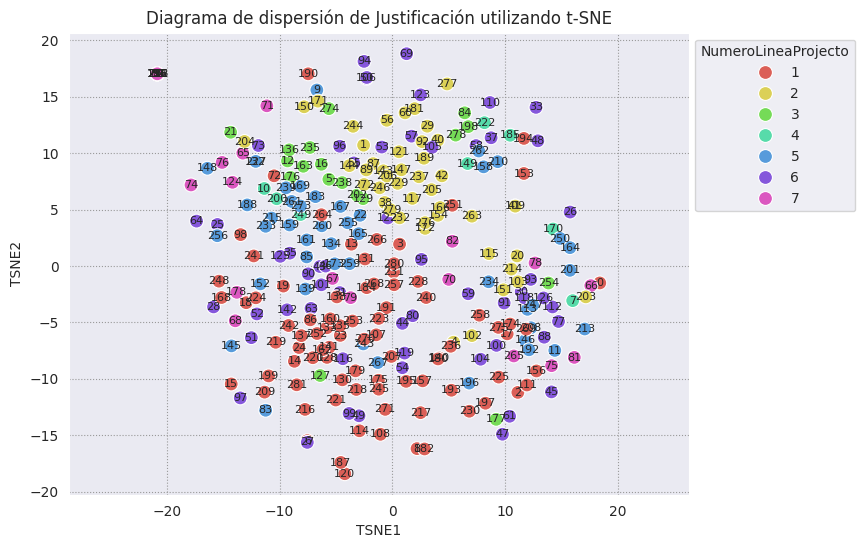

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(8, 6))
sns.set_style('darkgrid', {"grid.color": ".6", "grid.linestyle": ":"})

# Convertir la columna 'NumeroLineaProjecto' a categórica
df_tsne['NumeroLineaProjecto'] = df_tsne['NumeroLineaProjecto'].astype('category')

# Aumentar el tamaño de los puntos
sns.scatterplot(data=df_tsne, x='TSNE1', y='TSNE2', hue='NumeroLineaProjecto', palette='hls', s=100)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('Diagrama de dispersión de Justificación utilizando t-SNE')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.axis('equal')

# Agregar números con tamaño de fuente más pequeño
for i, row in df_tsne.iterrows():
    ax.text(row['TSNE1'], row['TSNE2'], str(i), ha='center', va='center', fontsize=8)

plt.show()

Compare results to KMeans

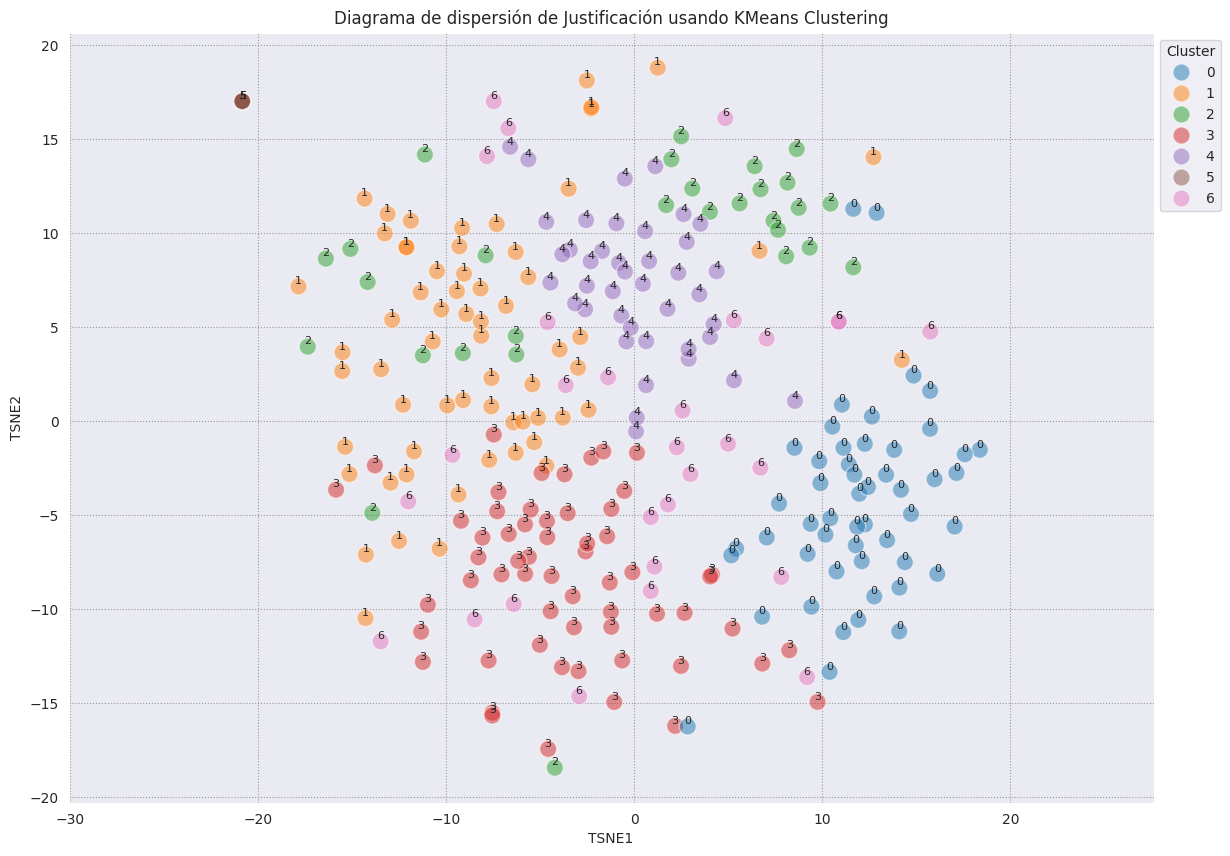

In [ ]:
# Apply KMeans
kmeans_model = KMeans(n_clusters=7, random_state=1, n_init=20, init='k-means++').fit(X)
labels = kmeans_model.labels_

df_tsne['Cluster'] = labels


# Visualización
fig, ax = plt.subplots(figsize=(14, 10))
sns.set_style('darkgrid', {"grid.color": ".6", "grid.linestyle": ":"})

# Aumentar el tamaño de los puntos y ajustar la transparencia
sns.scatterplot(data=df_tsne, x='TSNE1', y='TSNE2', hue='Cluster',
                palette='tab10', s=150, alpha=0.5)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('Diagrama de dispersión de Justificación usando KMeans Clustering')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.axis('equal')

# Agregar etiquetas con el número de cluster
for i, row in df_tsne.iterrows():
    cluster = row['Cluster']
    ax.text(row['TSNE1'], row['TSNE2'] + 0.02, str(cluster), ha='center', va='bottom', fontsize=8)

plt.show()

Punto 0: Cluster 0 - Justificación: trabajo hace aporte consolidacion linea investigacion estetica teorias arte facultad artes asab universidad distrital francisco jose caldas aqui hace analisis obra representativa repertorio tradicion occidental plantea unas problematicas estilisticas tecnicas fundamentales repertorio mismo modo proyecto inscribe linea investigacion musica contexto musicas expresiones sonora regionales tradicionales populares colombia latinoamerica mundo pues basa practicas productos asociados quehacer musical arraigado tradicion occidental gran difusion fundamental repertorio violin aqui hace trabajo primeramente analitico despues interpretativo pieza anteriormente mencionada
Punto 1: Cluster 4 - Justificación: proyecto inscribe linea investigacion facultad artes asab denominada arte pedagogia conformacion coro contexto obliga indagacion relaciones tensiones originadas procesos ensenanza contexto tecnico industrial ensenanza arte ademas aplicacion teorias pedagogicas

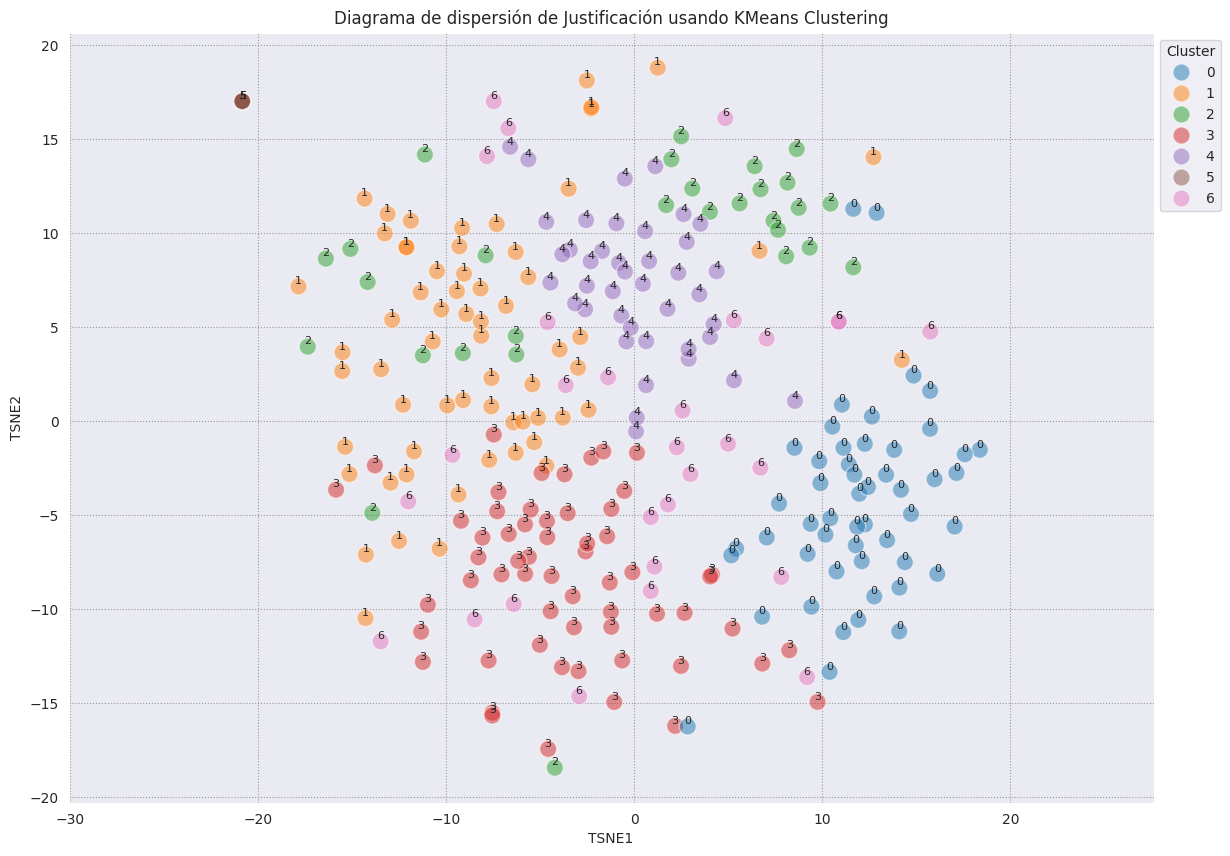

In [ ]:
# Apply KMeans
kmeans_model = KMeans(n_clusters=7, random_state=1, n_init=20, init='k-means++').fit(X)
labels = kmeans_model.labels_

df_tsne['Cluster'] = labels


# Visualización
fig, ax = plt.subplots(figsize=(14, 10))
sns.set_style('darkgrid', {"grid.color": ".6", "grid.linestyle": ":"})

# Aumentar el tamaño de los puntos y ajustar la transparencia
sns.scatterplot(data=df_tsne, x='TSNE1', y='TSNE2', hue='Cluster',
                palette='tab10', s=150, alpha=0.5)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('Diagrama de dispersión de Justificación usando KMeans Clustering')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.axis('equal')

# Agregar etiquetas con el número de cluster e imprimir información
for i, row in df_tsne.iterrows():
    cluster = row['Cluster']
    justificacion = df['Justificacion'][i]  # Obtener la justificación del DataFrame original
    ax.text(row['TSNE1'], row['TSNE2'] + 0.02, str(cluster), ha='center', va='bottom', fontsize=8)
    print(f"Punto {i}: Cluster {cluster} - Justificación: {justificacion}")

plt.show()

In [ ]:
import plotly.express as px!pip install plotly

In [ ]:
import plotly.express as px

# Visualización con Plotly
fig = px.scatter(df_tsne, x='TSNE1', y='TSNE2', color='Cluster',
                 hover_data=['Justificación'],  # Mostrar la justificación al pasar el mouse
                 title='Diagrama de dispersión de Justificación usando KMeans Clustering')

fig.show()

In [ ]:
!pip install bokeh

In [ ]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.io import output_notebook

# Preparar los datos para Bokeh
source = ColumnDataSource(data=df_tsne)

# Crear la figura
fig = figure(title='Diagrama de dispersión de Justificación usando KMeans Clustering',
           x_axis_label='TSNE1', y_axis_label='TSNE2',
           tools=['pan', 'wheel_zoom', 'box_zoom', 'reset'])

# Agregar los puntos al gráfico
fig.scatter(x='TSNE1', y='TSNE2', source=source, color='Cluster', legend_field='Cluster')

# Agregar la herramienta HoverTool para mostrar la justificación
hover = HoverTool(tooltips=[('Punto', '$index'),
                           ('Cluster', '@Cluster'),
                           ('Justificación', '@Justificación')])
fig.add_tools(hover)

# Mostrar el gráfico en el Notebook
output_notebook()
show(fig)